![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 3: Logistic Regression & Classification

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 125

<hr style="height:2.4pt">

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from prettytable import PrettyTable

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### Wang Sherpa, Prasanna and Rovina Pinto

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with gene data from a cancer study in **Part A** and another with the COMPAS data in **Part B**.


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part A: Cancer Classification from Gene Expressions [45 points total] </h2>    <br />

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The dataset is provided in the file `data/cancer_genes.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The column `Cancer_type` gives the types of cancer, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use logistic regression to build classification models for this data set. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the dataset [5 points]** 

To reach the goal of classification of the classes of cancer, start by inspecting the dataset.

**1.1** [1pt] Load the dataset and split the data into an approximate 80-20 train-test sets. <br /><br />
**1.2** [2pts] Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. 
<br />**NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.** <br/><br />
**1.3** [2pts] The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences. <br /><br />


## Solutions 

### 1.1

In [2]:
# load the dataset
gene_data = pd.read_csv('data/cancer_genes.csv')

# Select predictor and response variables
X = gene_data.iloc[:, 2:]
y = gene_data.iloc[:, 1]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns, index=X.index)

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [3]:
gene_data.head()

,Unnamed: 0,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0,0.0,-214.0,-153.0,-58.0,88.0,-295.0,-558.0,199.0,-176.0,...,185.0,511.0,-125.0,389.0,-37.0,793.0,329.0,36.0,191.0,-37.0
1,1,0.0,-135.0,-114.0,265.0,12.0,-419.0,-585.0,158.0,-253.0,...,240.0,835.0,218.0,174.0,-110.0,627.0,170.0,-50.0,126.0,-91.0
2,2,0.0,-106.0,-125.0,-76.0,168.0,-230.0,-284.0,4.0,-122.0,...,156.0,649.0,57.0,504.0,-26.0,250.0,314.0,14.0,56.0,-25.0
3,3,0.0,-72.0,-144.0,238.0,55.0,-399.0,-551.0,131.0,-179.0,...,30.0,819.0,-178.0,151.0,-18.0,1140.0,482.0,10.0,369.0,-42.0
4,4,0.0,-413.0,-260.0,7.0,-2.0,-541.0,-790.0,-275.0,-463.0,...,289.0,629.0,-86.0,302.0,23.0,1798.0,446.0,59.0,781.0,20.0


### 1.2

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_norm = scaler.fit_transform(X_train) #why are we normalizing it twice??

X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)

X_train_norm_df.head()


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
585,0.449248,0.511972,0.691606,0.556606,0.364965,0.354236,0.704394,0.286927,0.686325,0.386291,...,0.482527,0.411166,0.501314,0.435314,0.624691,0.469081,0.431141,0.693760,0.591315,0.574723
131,0.621339,0.334273,0.589230,0.439587,0.524953,0.491959,0.790105,0.568881,0.676857,0.561299,...,0.699944,0.595743,0.374207,0.427203,0.503224,0.700563,0.399552,0.419959,0.458827,0.503399
44,0.452590,0.571979,0.175384,0.299435,0.390593,0.156838,0.834868,0.416063,0.586133,0.414187,...,0.522651,0.697904,0.348884,0.481884,0.598199,0.760218,0.588167,0.630986,0.467961,0.375811
70,0.519899,0.594946,0.446535,0.385027,0.619542,0.284109,0.584905,0.390877,0.692030,0.358181,...,0.571541,0.466914,0.452232,0.493513,0.623522,0.529816,0.414027,0.478155,0.474361,0.548732
495,0.398330,0.593005,0.958477,0.469305,0.750095,0.701559,0.686183,0.263501,0.653636,0.279331,...,0.474250,0.760125,0.788170,0.459884,0.858958,0.545933,0.344929,0.872755,0.656071,0.340730


### 1.3

**The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset?**

**Ans: When there are more predictors than the number of observations, then the classification model will overfit**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 2: Determining the best predictors [15 points]** 
<br /><br />
 
**2.1** [10pts] The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset). 
 
**Hint:** You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .
 
<br /><br />
**2.2** [5pts] Call the predictor that discriminates the best above `best_predictor` and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different `Cancer_type` classes.


## Solutions 

### 2.1

In [5]:
t_dict = {}
def ttest(Xtrain, ytrain, n): 
    """ Calculate t-test value and return n best predictors
    Parameters:
    -----------
    
    Xtrain: training predictors df
    ytrain: training labels
    n = no of best prepdictors to be returned
    
    Returns:
    --------
    best_predictors: List
                    contains a list of n best predictors based on t-test
    """
    cols = Xtrain.columns
    for col in cols:
        x1 = Xtrain[ytrain==1][col] 
        x2 = Xtrain[ytrain==0][col]
        x1_mean = x1.mean()
        x2_mean = x2.mean()
        mean_diff = np.abs(x1_mean - x2_mean)
        n1 = len(x1)
        n2 = len(x2)
        var1 = np.var(x1, ddof = 1)
        var2 = np.var(x2, ddof = 1)
        denominator = np.sqrt((var1/n1) + var2/n2)
        test_value = mean_diff/denominator
        t_dict[col] = test_value
    sorted_preds = sorted(t_dict.items(), key=lambda x: x[1], reverse=True)
    best_predictors = [p[0] for p in sorted_preds]
    
    return best_predictors[:n]

In [6]:
# 10 genes that individually discriminate between the two cancer classes the best

ten_best_genes = ttest(X_train_norm_df, y_train, 10)
ten_best_genes  # using scipy.stats.ttest_ind gave 9 different best predictors excluding the first best one

['X95735_at',
 'Y08612_at',
 'M31523_at',
 'X61587_at',
 'U50136_rna1_at',
 'X17042_at',
 'M84526_at',
 'X76648_at',
 'J04615_at',
 'X59350_at']

### 2.2

In [7]:
best_predictor = ten_best_genes[0]
print("The best predictor column is:",best_predictor)

The best predictor column is: X95735_at


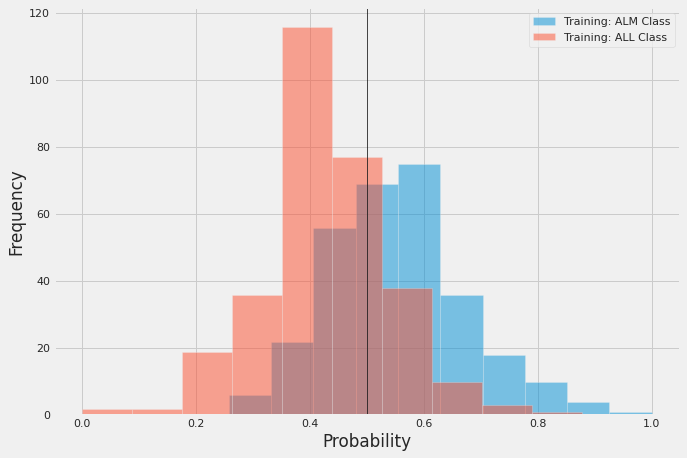

In [8]:
# plot histogram of best predictor column in train set
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
plt.hist(X_train_norm_df[best_predictor][y_train==1], alpha=0.5, label='Training: ALM Class')
plt.hist(X_train_norm_df[best_predictor][y_train==0], alpha=0.5, label='Training: ALL Class')
plt.axvline(0.5, color='k', linewidth =0.8)
plt.legend()
plt.xlabel("Probability") #or the log odds?
plt.ylabel("Frequency") 
plt.show()

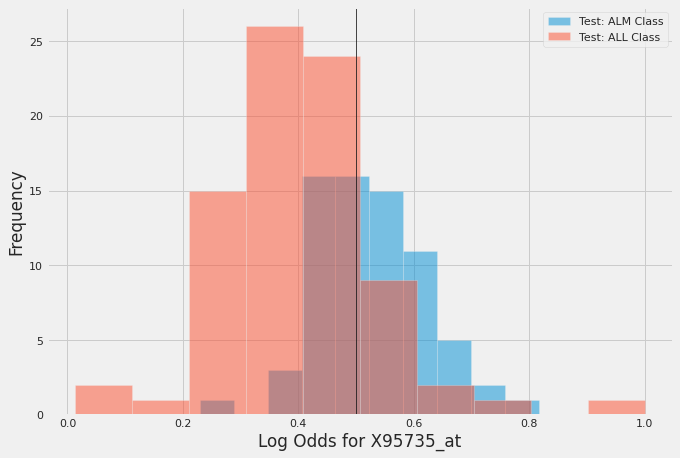

In [9]:
# plot histogram of best predictor column in test set
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
plt.hist(X_test[best_predictor][y_test==1], alpha=0.5, label='Test: ALM Class')
plt.hist(X_test[best_predictor][y_test==0], alpha=0.5, label='Test: ALL Class')
plt.axvline(0.5, color='k', linewidth =0.8)
plt.xlabel("Log Odds for X95735_at")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 3: Predicting the types of cancer based on gene expression [25 points]**
<br /><br />

**3.1** [10pts] Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` identified in the previous part to predict cancer type. <br/>
**Note:** Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').
<br /><br />

**3.2** [5pts] Print and interpret Logistic Regression coefficient and intercept. 
<br /><br />
**3.3** [10pts] Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

## Solutions

### 3.1

In [10]:
# set the predictor
x_train = X_train[[best_predictor]]
x_test = X_test[[best_predictor]]

# instantiate logistic regression model
log_clf = LogisticRegression(C=100000)
# fit the logistic regression model
log_clf.fit(x_train, y_train)

LogisticRegression(C=100000)

### 3.2

In [11]:
coef = log_clf.coef_
intercept = log_clf.intercept_
print("Coefficient:", coef)
print("Intercept:", intercept)

Coefficient: [[10.08762369]]
Intercept: [-4.68574901]


In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-(intercept + coef*x)))

x = np.linspace(0, 1, 1000)
y = sigmoid(x)

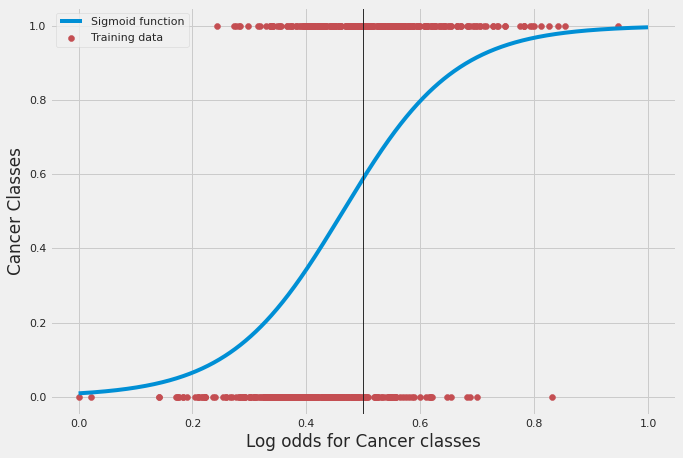

In [13]:
y_ = y.reshape(-1, 1)
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, color='r', label="Training data")
plt.plot(x, y_, label='Sigmoid function')
plt.axvline(0.5, color='k', linewidth=0.9)
plt.xlabel("Log odds for Cancer classes")
plt.ylabel("Cancer Classes") # need to label at y =0 and y =1 as ALL class and AML class
plt.legend()

**interpret Logistic Regression coefficient and intercept.**** 

### 3.3
<b>
Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor.<br />
- the true binary response.<br />
- a horizontal line at y=0.5.
</b>

In [14]:
train_preds = log_clf.predict_proba(x_train) # for test data too?
test_preds = log_clf.predict_proba(x_test)

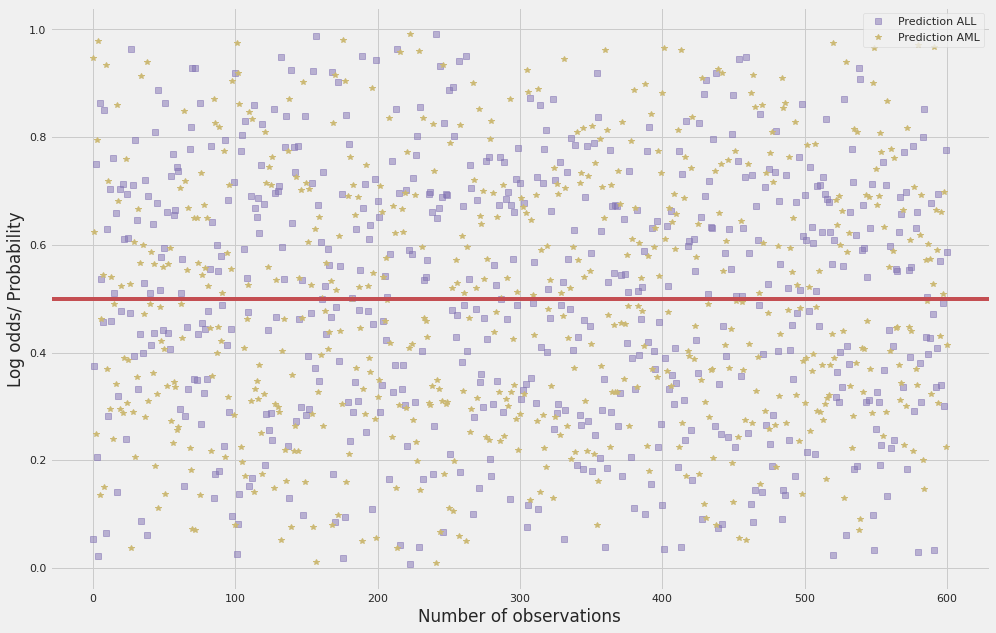

In [15]:
# Plots for training set
plt.figure(figsize=(15, 10))
#plt.scatter(x, y, 'bo', color='green', alpha=0.4, label="Training- ALL") #not training data but true response y
#plt.plot(X_norm[y == 1], 'v', color='blue', alpha=0.4, label="Training- AML")
plt.plot(train_preds[:, 0], 's', color='m', label='Prediction ALL', alpha=0.5)
plt.plot(train_preds[:, 1], '*', color='y', label='Prediction AML')
plt.axhline(0.5, color='r')
plt.xlabel("Number of observations") #check labels
plt.ylabel("Log odds/ Probability")
plt.legend(loc='upper right')
plt.show() # dont like these plots. Cant tell whats happening. Also why do we have so many more predictions??

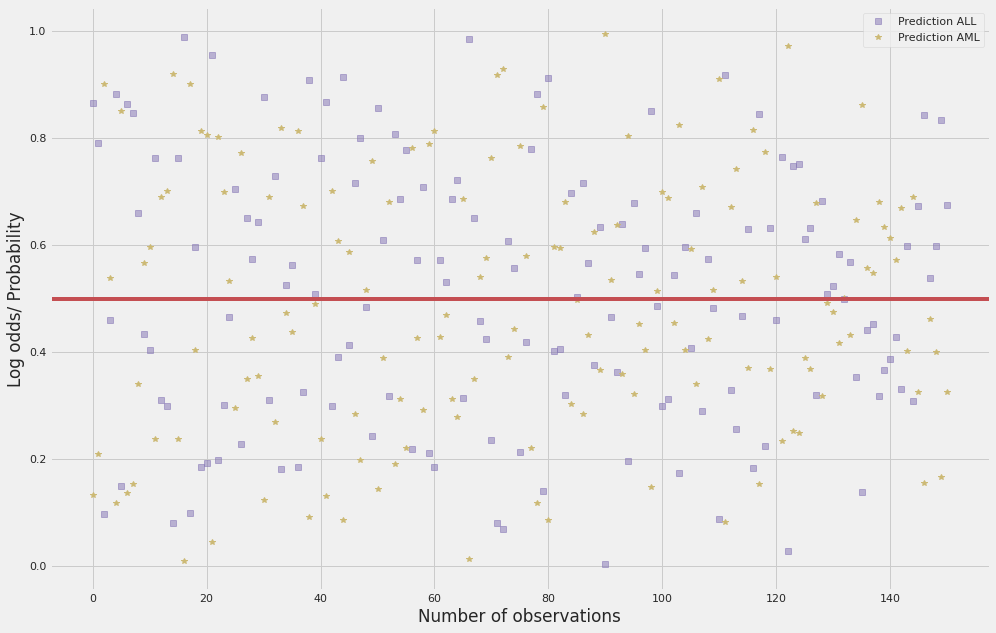

In [16]:
plt.figure(figsize=(15, 10))
#plt.plot(x_test[y_test == 0], 'bo', color='green', alpha=0.4, label="Test ALL")
#plt.plot(x_test[y_test == 1], 'v', color='blue', alpha=0.4, label="Test AML") #not test data but true response y
plt.plot(test_preds[:, 0], 's', color='m', label='Prediction ALL', alpha=0.5)
plt.plot(test_preds[:, 1], '*', color='y', label='Prediction AML')
plt.axhline(0.5, color='r')
plt.xlabel("Number of observations") #check labels
plt.ylabel("Log odds/ Probability")
plt.legend()
plt.show() 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems [60 points total] </h2>    <br />


![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br /><br />
<b> Dataset Description </b><br /><br />
The main dataset is the *compas.csv*.
The variables are roughly explained in the `compas_datadict.csv` file, and ProPublica's analysis is publically available here: https://github.com/propublica/compas-analysis.

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]**

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.<br />

NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

## Solutions

### 1.1

In [17]:
# Get the data
df = pd.read_csv('data/compas.csv')

#Splitting the races
aa_df = df[df['race'] == 'African-American']
c_df = df[df['race'] == 'Caucasian']

In [18]:
new_df = pd.concat([aa_df, c_df], ignore_index=True)

new_df.head()

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,...,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,F,Possession of Cannabis,African-American,Medium,1,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,49,M,Battery,African-American,Low,1,6,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,44,F,Felony Driving While Lic Suspd,African-American,High,1,14,0,0,0,...,0,0,1,0,0,0,0,0,0,2
4,22,F,Grand Theft in the 3rd Degree,African-American,High,1,4,0,0,0,...,0,1,0,0,0,0,0,0,1,30


In [19]:
# Encode categorical columns

df_dummies = pd.get_dummies(data=new_df, drop_first=True)
df_dummies.head()

,age,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,decile_score,two_year_recid,length_of_stay,priors_1,...,c_charge_desc_Viol Pretrial Release Dom Viol,c_charge_desc_Viol Prot Injunc Repeat Viol,c_charge_desc_Violation License Restrictions,c_charge_desc_Violation Of Boater Safety Id,c_charge_desc_Violation of Injunction Order/Stalking/Cyberstalking,c_charge_desc_Voyeurism,c_charge_desc_arrest case no charge,race_Caucasian,score_text_Low,score_text_Medium
0,28,1,0,0,0,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34,1,7,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,1,6,0,0,0,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,44,1,14,0,0,0,8,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,22,1,4,0,0,0,9,1,260,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# assign predictor and response variable
X = df_dummies.drop("two_year_recid", axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
X_aa = X[X.race_Caucasian == 0]
y_aa = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
X_c = X[X.race_Caucasian == 1]
y_c = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_dummies.race_Caucasian)

### 1.2
<b>Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?

**Your answer here**

### 1.3


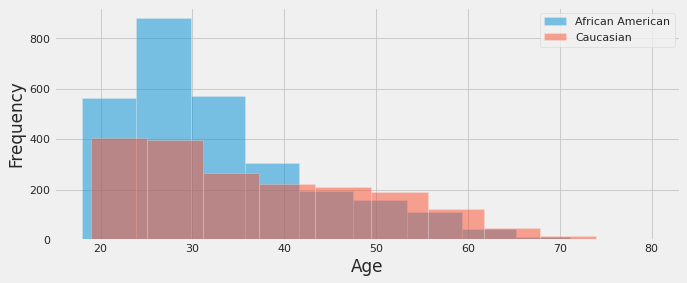

In [21]:
plt.figure(figsize=(10, 4))
aa_df["age"].plot(kind="hist", label="African American", alpha = 0.5)
c_df["age"].plot(kind="hist", label="Caucasian", alpha =0.5)
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.legend()
plt.show()

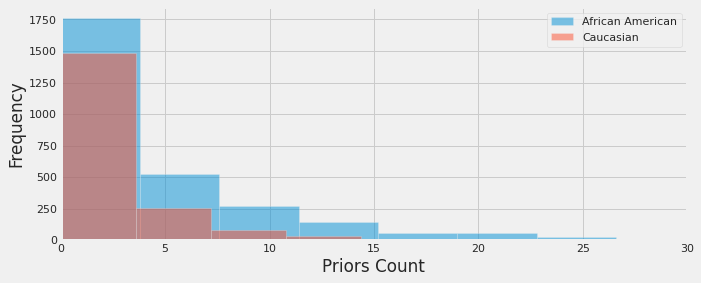

In [22]:
plt.figure(figsize=(10, 4))
aa_df["priors_count"].plot(kind="hist", label="African American", alpha =0.5)
c_df["priors_count"].plot(kind="hist", label="Caucasian", alpha=0.5)
plt.xlim(0,30)
plt.xlabel("Priors Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

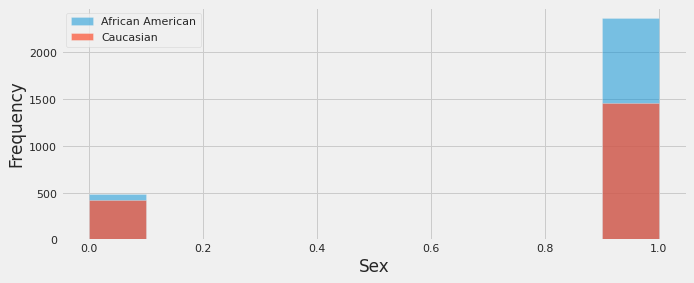

In [23]:
plt.figure(figsize=(10, 4))
aa_df["sex"].plot(kind="hist", label="African American", alpha=0.5) #need only 0 and 1 and label as male and female
c_df["sex"].plot(kind="hist", label="Caucasian", alpha=0.7)
plt.ylabel("Frequency")
plt.xlabel("Sex")
plt.legend()
plt.show()

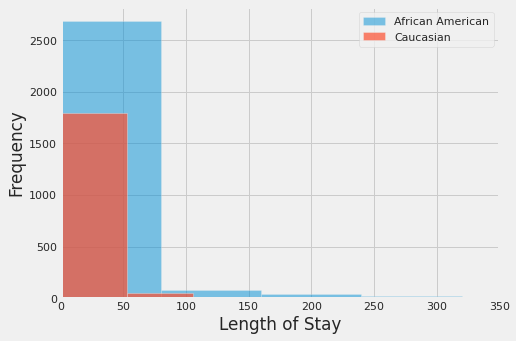

In [24]:
plt.figure(figsize=(7,5))
aa_df["length_of_stay"].plot(kind="hist", label="African American", alpha = 0.5)
c_df["length_of_stay"].plot(kind="hist", label="Caucasian", alpha=0.7)
plt.ylabel("Frequency")
plt.xlim(0,350)
plt.xlabel("Length of Stay")
plt.legend()
plt.show()

### 1.4
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]**

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**NOTE**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


## Solutions

### 2.1

In [25]:
# this function returns FPR and FNR given true and predicted values

def cal_fpr_fnr(ytest, y_preds):
    TN = confusion_matrix(ytest, y_preds)[0][0]
    FP = confusion_matrix(ytest, y_preds)[0][1]
    FN = confusion_matrix(ytest, y_preds)[1][0]
    TP = confusion_matrix(ytest, y_preds)[1][1]
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    return FPR, FNR

In [26]:
# instantiate logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=10000)

# fit on the training set
log_clf.fit(Xtrain, ytrain)

# predict on validation set
y_preds = log_clf.predict(Xtest)

aa_preds = log_clf.predict(X_aa)
c_preds = log_clf.predict(X_c)

fpr_aa, fnr_aa = cal_fpr_fnr(y_aa, aa_preds)
fpr_c, fnr_c = cal_fpr_fnr(y_c, c_preds)

fpr_ratio = fpr_aa/fpr_c
fnr_ratio = fnr_aa/fnr_c

# calculate overall accuracy
acc = accuracy_score(ytest, y_preds)

# Display Overall Accuracy, FPR and FNR for two races

print("Overall model accuracy: {:.2f}%".format(acc*100))
print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100))
print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_c * 100))

print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100))
print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_c * 100))

print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio))
print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio))

Overall model accuracy: 69.47%

False Positive Rate (African American): 31.30%
False Positive Rate (Caucasian): 16.32%

False Negative Rate (African American): 27.08%
False Negative Rate (Caucasian): 48.79%

Ratio of the FPR between African_Americans and Caucasians: 1.918
Ratio of the FNR between African_Americans and Caucasians: 0.555


### 2.2
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

**It is evident from the FPR that the African American community as per the given data is more likely to be wrongly accussed for crimes they did not commit twice as more as compared to the Caucasians. And the disparity becomes even more obvious when we look at the FNR for both communities as the Caucasians for almost 50 percent of the time are not correctly identified as criminals.**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]**
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


## Solutions

### 3.1

In [27]:
# assign predictor and response variable without race as a predictor
X_new = df_dummies.drop(["two_year_recid", "race_Caucasian"], axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
X_aa_new = X_aa.drop("race_Caucasian", axis=1)
y_aa_new = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
X_c_new = X_c.drop("race_Caucasian", axis=1)
y_c_new = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [28]:
# Refitting the logistic model wihtout race as a predictor
log_clf.fit(Xtrain, ytrain)
# predict on validation set
y_preds = log_clf.predict(Xtest)

aa_preds = log_clf.predict(X_aa_new)
c_preds = log_clf.predict(X_c_new)

fpr_aa, fnr_aa = cal_fpr_fnr(y_aa_new, aa_preds)
fpr_c, fnr_c = cal_fpr_fnr(y_c_new, c_preds)

fpr_ratio = fpr_aa/fpr_c
fnr_ratio = fnr_aa/fnr_c

# calculate overall accuracy
acc = accuracy_score(ytest, y_preds)

# Display Overall Accuracy, FPR and FNR for two races

print("Overall model accuracy: {:.2f}%".format(acc*100))
print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100))
print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_c * 100))

print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100))
print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_c * 100))

print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio))
print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio))

Overall model accuracy: 67.16%

False Positive Rate (African American): 29.90%
False Positive Rate (Caucasian): 16.23%

False Negative Rate (African American): 27.95%
False Negative Rate (Caucasian): 49.60%

Ratio of the FPR between African_Americans and Caucasians: 1.842
Ratio of the FNR between African_Americans and Caucasians: 0.564


### 3.2
<b>
Now, without the race as a predictor, what do you observe?

**The model hardly changes in terms of accuracy and FPR and FNR after dropping race as a predictor. Perhaps there are other predictors apart from race that are introducing bias into our model.**

### 3.3
<b>How do these compare to the model when the race is included as a predictor?

**Your answer here**

### 3.4
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]**

**4.1** [5pts] Use logistic regression & upsampling methods from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


## Solutions

### 4.1

In [32]:
# assign predictor and response variable
X = df_dummies.drop("two_year_recid", axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
X_aa = X[X.race_Caucasian == 0]
y_aa = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
X_cc = X[X.race_Caucasian == 1]
y_cc = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_dummies.race_Caucasian)

log_clf = LogisticRegression(random_state=42, max_iter=10000)

# fit on the training set
log_clf.fit(Xtrain, ytrain)

# predict on test set
y_preds = log_clf.predict_proba(Xtest)

aa_preds = log_clf.predict_proba(X_aa)[:,1]
cc_preds = log_clf.predict_proba(X_cc)[:,1]

In [30]:
def plot_roc(test1, test2, probs1, probs2, axis, threshold=False): # From Hargun's session
    fpr, tpr, thresholds = roc_curve(test1, probs1)
    kfpr, ktpr, kthresholds = roc_curve(test2, probs2)
    ax.plot(fpr, tpr,  color = 'b')
    ax.plot(kfpr, ktpr,  color = 'g')  
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.4,
    )

    if threshold:
        for k in range(0, fpr.shape[0],50):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k],2 ))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)

        for k in range(1, kfpr.shape[0], 50):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(kthresholds[k], 2))
            ax.annotate(threshold, (kfpr[k], ktpr[k]),color='r', **label_kwargs)

    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")


No handles with labels found to put in legend.


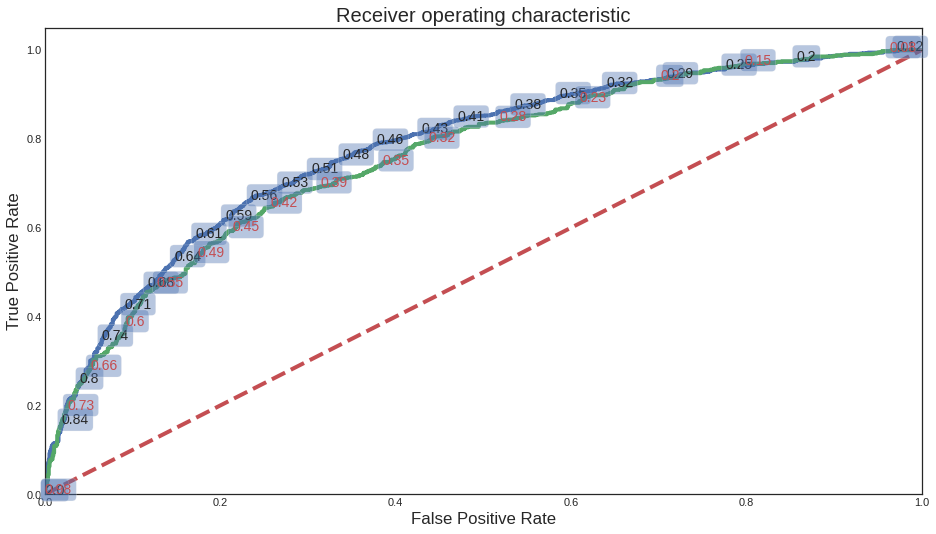

In [33]:
#ROC Curve values
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (14,8))
plot_roc(y_aa,y_cc, aa_preds,cc_preds,ax, threshold=True)

### 4.2

In [34]:
#Creating a boundary condition and checking the accuracy and FPR for both races

# Computing the ROC curve for African American and Caucasian Models
aa_scores = aa_preds[:,1]
FPRa, TPRa, thresholda = roc_curve(y_aa, aa_scores) 

threshold_60_recall = thresholda[np.argmax(TPRa >= 0.60)]
aa_preds_60 = (aa_scores >= threshold_60_recall)

IndexError: too many indices for array

In [ ]:
#Calculating the log odds for both races
aa_scores = log_clf.predict_proba(X_aa)[:, 1] 
cc_scores = log_clf.predict_proba(X_cc)[:, 1] 

#Computing the predictions given the threshold
aa_preds = (aa_scores >= threshold_60_recall) 
cc_preds = (cc_scores >= threshold_60_recall) 

fpr_aa, fnr_aa = cal_fpr_fnr(y_aa, aa_preds) 
fpr_cc, fnr_cc = cal_fpr_fnr(y_cc, cc_preds) 

fpr_ratio = fpr_aa/fpr_cc 
fnr_ratio = fnr_aa/fnr_cc 

# calculate overall accuracy 
#acc = accuracy_score(ytest, y_preds) #but we aren't doinf anything to the model so why the accuracy?

# Display Overall Accuracy, FPR and FNR for two races 
#print("Overall model accuracy: {:.2f}%".format(acc*100)) 
print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100)) 
print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_cc * 100)) 
print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100)) 
print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_cc * 100)) 
print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio)) 
print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio)) 

<b>
How to ensure the model is accuracte and unbiased? 

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [20 points total] 
</h2>  
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.



In [35]:
# Get the data
df = pd.read_csv('data/compas.csv')

#Splitting the races
aa_df = df[df['race'] == 'African-American']
cc_df = df[df['race'] == 'Caucasian']

new_df = pd.concat([aa_df, cc_df], ignore_index=True)

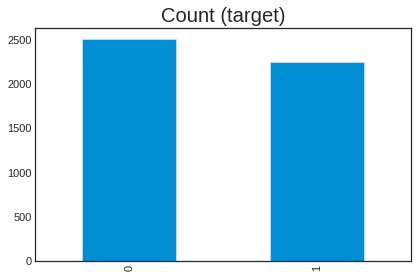

In [36]:
#Demonstrating class imbalance
target_count = new_df['two_year_recid'].value_counts()
target_count.plot(kind='bar', title='Count (target)');

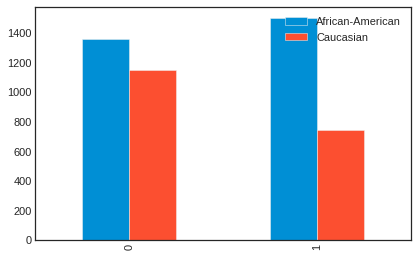

In [37]:
aa_class_counts = aa_df['two_year_recid'].value_counts()
cc_class_counts = cc_df['two_year_recid'].value_counts()
class_counts = pd.concat([aa_class_counts, cc_class_counts], keys=['African-American', 'Caucasian'], axis = 1)
class_counts.plot(kind='bar')

**From the plot, it is clear that the maximum count is that of African Americans with class 1 ie two_year_recid. Therefore we upsample the other class to remove the imbalance in our data.**

In [38]:
max_num = class_counts.loc[1, 'African-American']
aa_df_class0 = aa_df[aa_df['two_year_recid'] == 0]
aa_df_class1 = aa_df[aa_df['two_year_recid'] == 1]
cc_df_class0 = cc_df[cc_df['two_year_recid'] == 0]
cc_df_class1 = cc_df[cc_df['two_year_recid'] == 1]
aa_df_class0_new = aa_df_class0.sample(max_num, replace=True)
cc_df_class0_new = cc_df_class0.sample(max_num, replace=True)
cc_df_class1_new = cc_df_class1.sample(max_num, replace=True)
new_df = pd.concat([aa_df_class0_new, aa_df_class1, cc_df_class0_new, cc_df_class1_new], axis = 0)

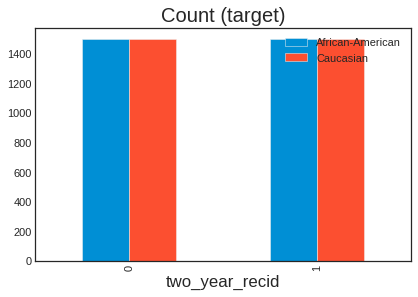

In [39]:
vc =  new_df.groupby('race')['two_year_recid'].value_counts()
pd.concat([vc['African-American'], vc['Caucasian']], axis = 1, keys=['African-American', 'Caucasian']).plot(kind='bar', title='Count (target)');

In [40]:
new_df1 = new_df.copy()
cont_df = new_df1[['age', 'priors_count', 'length_of_stay', 'length_of_stay_thresh']]
new_df1.drop(['age', 'priors_count', 'length_of_stay', 'length_of_stay_thresh'], axis = 1, inplace = True)

poly = PolynomialFeatures(degree = 3)
scaler = MinMaxScaler()

cont_poly = poly.fit_transform(scaler.fit_transform(cont_df))
new_df2 = pd.concat([new_df1.reset_index(drop = True), pd.DataFrame(cont_poly)], axis = 1)

**We then used Polynomial Features with degree 3 (which we found to be the best degree) on the continuous predictors and scaled the data** What about decile score in cont_df?? 
**We also dropped c_charge_desc, decile_score and score_text but didn't notice significant improvements in our models and hence left them in our dataset**

In [ ]:
#plot decile score and score text for AA and C

In [41]:
df_dummies = pd.get_dummies(data=new_df2, drop_first=True)

X = df_dummies.drop("two_year_recid", axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
Xa = X[X.race_Caucasian == 0]
ya = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
Xc = X[X.race_Caucasian == 1]
yc = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_dummies.race_Caucasian)

In [42]:
# this function returns FPR and FNR given true and predicted values
def cal_fpr_fnr(ytest, y_preds):
    TN = confusion_matrix(ytest, y_preds)[0][0]
    FP = confusion_matrix(ytest, y_preds)[0][1]
    FN = confusion_matrix(ytest, y_preds)[1][0]
    TP = confusion_matrix(ytest, y_preds)[1][1]
    FPR = FP / (FP + TN) # false alarm: FP/total no. of postiives, FNR=FN/total no. of negatives
    FNR = FN / (FN + TP) #miss rate – probability that a true positive will be missed by the test
    return FPR, FNR

In [43]:
# new metric bias_corrected_accuracy

def bias_corrected_accuracy(y_test, y_aa, y_cc, y_pred, y_pred_aa, y_pred_cc):
    
    accuracy = accuracy_score(y_test, y_pred)
    
    FPR_aa, FNR_aa = cal_fpr_fnr(y_aa, y_pred_aa)
    FPR_cc, FNR_cc = cal_fpr_fnr(y_cc, y_pred_cc)
    
    BCA = accuracy - np.abs(FPR_aa - FPR_cc)
    
    return BCA

In [44]:
def print_score(ytest, ypreds, ya, aa_preds, yc, cc_preds, print_sc=False):
    fpr_aa, fnr_aa = cal_fpr_fnr(ya, aa_preds)
    fpr_c, fnr_c = cal_fpr_fnr(yc, cc_preds)

    fpr_ratio = fpr_aa/fpr_c
    fnr_ratio = fnr_aa/fnr_c

    # calculate overall accuracy
    acc = accuracy_score(ytest, ypreds)

    bca = bias_corrected_accuracy(ytest, ya, yc, ypreds, aa_preds, cc_preds)

    # Display Overall Accuracy, FPR and FNR for two races
    if print_sc:
        print("Overall model accuracy: {:.2f}%".format(acc*100))
        print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100))
        print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_c * 100))

        print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100))
        print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_c * 100))

        print("\nBias Corrected Accuracy: {:.2f}%".format(bca * 100))

        print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio))
        print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio))

    scores = {
        "BCA": np.round((bca*100), 2),
        "FPR(AA)": np.round((fpr_aa*100), 2),
        "FPR(C)": np.round((fpr_c*100), 2),
        "FNR(AA)": np.round((fnr_aa*100), 2),
        "FNR(C)": np.round((fnr_c*100), 2),
        
    }
    
    return scores

**We used three algorithms- Logistic Regression, KNN classifier and Random Forest Classifier to compare which performed the best**

In [45]:
def models(Xtrain, ytrain, Xtest, ytest, Xa, ya, Xc, yc, model, print_sc=False):
    
    if model == "lr":
        lclf = LogisticRegression(random_state=42, max_iter=10000, C=10)
        lclf.fit(Xtrain, ytrain)
        y_preds = lclf.predict(Xtest)
        aa_preds = lclf.predict(Xa)
        cc_preds = lclf.predict(Xc)
        y_scores = lclf.predict_proba(Xtest)[:, 1]
        aa_scores = lclf.predict_proba(Xa)[:, 1]
        cc_scores = lclf.predict_proba(Xc)[:, 1]
    if model == "knn":
        knn = KNeighborsClassifier()
        knn.fit(Xtrain, ytrain)
        y_preds = knn.predict(Xtest)
        aa_preds = knn.predict(Xa)
        cc_preds = knn.predict(Xc)
        y_scores = knn.predict_proba(Xtest)[:, 1]
        aa_scores = knn.predict_proba(Xa)[:, 1]
        cc_scores = knn.predict_proba(Xc)[:, 1]
    if model == "rf":
        rf = RandomForestClassifier(random_state=42)
        rf.fit(Xtrain, ytrain)
        y_preds = rf.predict(Xtest)
        aa_preds = rf.predict(Xa)
        cc_preds = rf.predict(Xc)
        y_scores = rf.predict_proba(Xtest)[:, 1]
        aa_scores = rf.predict_proba(Xa)[:, 1]
        cc_scores = rf.predict_proba(Xc)[:, 1]
        
    scores = print_score(ytest, y_preds, ya, aa_preds, yc, cc_preds, print_sc)
        
    return y_preds, y_scores, aa_preds, aa_scores, cc_preds, cc_scores, scores


In [46]:
log_preds = models(Xtrain, ytrain, Xtest, ytest, Xa, ya, Xc, yc, model="lr")
knn_preds = models(Xtrain, ytrain, Xtest, ytest, Xa, ya, Xc, yc, model="knn")
rf_preds = models(Xtrain, ytrain, Xtest, ytest, Xa, ya, Xc, yc, model="rf", print_sc=True)

Overall model accuracy: 83.50%

False Positive Rate (African American): 4.00%
False Positive Rate (Caucasian): 1.87%

False Negative Rate (African American): 5.94%
False Negative Rate (Caucasian): 2.40%

Bias Corrected Accuracy: 81.37%

Ratio of the FPR between African_Americans and Caucasians: 2.143
Ratio of the FNR between African_Americans and Caucasians: 2.472


In [47]:
table = pd.DataFrame(data=rf_preds[-1].values(), columns=["Log"], index=rf_preds[-1].keys())

In [48]:
def plot_roc(test, scores, label=None):
    fpr, tpr, thres = roc_curve(test, scores)
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("False Positive Rate")
    plt.ylabel("Recall")

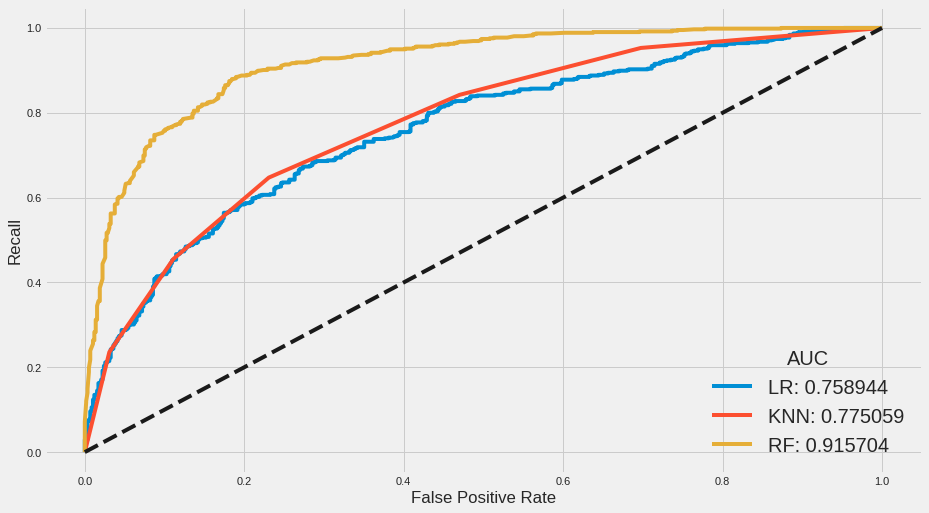

In [49]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 8))
plot_roc(ytest, log_preds[1], label=f"LR: {roc_auc_score(ytest, log_preds[1]):3f}")
plot_roc(ytest, knn_preds[1], label=f"KNN: {roc_auc_score(ytest, knn_preds[1]):3f}")
plot_roc(ytest, rf_preds[1], label=f"RF: {roc_auc_score(ytest, rf_preds[1]):3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(title="AUC", fontsize=20, title_fontsize=20)
plt.show()

**concluding remarks **